In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
def get_valid_trading_day(input_date):
    # Convert the input string to a datetime object
    date = datetime.strptime(input_date, "%Y-%m-%d")

    # Keep adding days until we reach a weekday (Monday to Friday)
    while date.weekday() >= 5:  # 5 is Saturday, 6 is Sunday
        date += timedelta(days=1)

    return date.strftime("%Y-%m-%d")  # Return the valid trading day in the same format

# Example usage
input_date = "2024-11-02"
valid_trading_day = get_valid_trading_day(input_date)
print(valid_trading_day)  # Output will be the next valid trading day
print(get_valid_trading_day(f'{2023}-01-01'))


2024-11-04
2023-01-02


[*********************100%***********************]  1 of 1 completed

Total Money Invested for Both: 12000.00
Valid lump sum dates: ['2023-01-02', '2023-02-01', '2023-03-01', '2023-04-03', '2023-05-01', '2023-06-01', '2023-07-03', '2023-08-01', '2023-09-01', '2023-10-02', '2023-11-01', '2023-12-01']
Stock Price at 2023-02-01: 123.82, Num Stocks: 8.00
Stock Price at 2023-03-01: 119.78, Num Stocks: 8.00
Stock Price at 2023-04-03: 131.66, Num Stocks: 7.00
Stock Price at 2023-05-01: 132.48, Num Stocks: 8.00
Stock Price at 2023-06-01: 144.79, Num Stocks: 7.00
Stock Price at 2023-07-03: 152.36, Num Stocks: 6.00
Stock Price at 2023-08-01: 157.49, Num Stocks: 7.00
Stock Price at 2023-09-01: 155.37, Num Stocks: 6.00
Stock Price at 2023-10-02: 148.65, Num Stocks: 7.00
Stock Price at 2023-11-01: 146.93, Num Stocks: 7.00
Stock Price at 2023-12-01: 160.43, Num Stocks: 6.00
Number of valid DCA dates: 11
Leftover cash from DCA Sum: 75.76
Final end of year close price: 168.54
Total stock value using DCA Sum: 13053.34
Profit/Loss percentage for DCA: 8.78%
---------------

ValueError: 'x' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

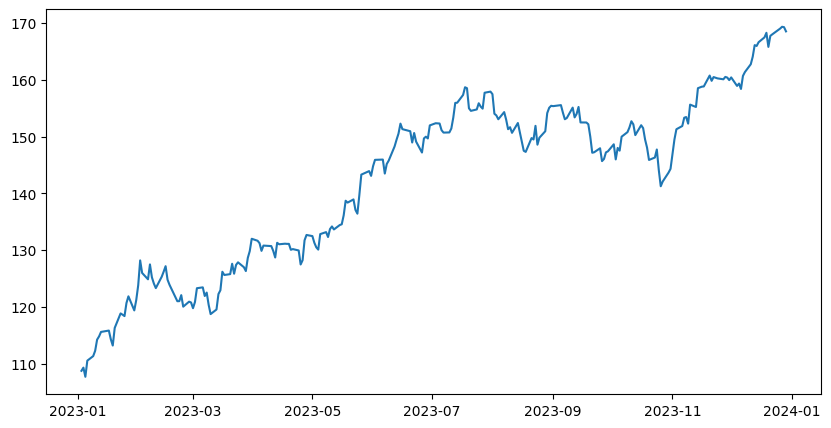

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

def get_valid_trading_day(input_date):
    # Convert the input string to a datetime object
    date = datetime.strptime(input_date, "%Y-%m-%d")

    # Keep adding days until we reach a weekday (Monday to Friday)
    while date.weekday() >= 5:  # 5 is Saturday, 6 is Sunday
        date += timedelta(days=1)

    return date.strftime("%Y-%m-%d")  # Return the valid trading day in the same format

def LumSum_vs_DCA(stock_name, start_year, average_deposit, lump_sum_dates, num_years=1):
    start_date = get_valid_trading_day(f'{start_year}-01-01')
    end_year = start_year + num_years
    end_date = get_valid_trading_day(f'{end_year}-01-01')
    
    # Fetch stock data
    stock_data = yf.download(stock_name, start=start_date, end=end_date)

    # Check if stock_data is empty
    if stock_data.empty:
        print(f"No data found for {stock_name} between {start_date} and {end_date}.")
        return

    # Reset the index to make 'Date' a column
    stock_data.reset_index(inplace=True)

    # Extract the date and close price
    dates = stock_data['Date']
    close_prices = stock_data['Close']

    total_amount_invested = average_deposit * num_years * 12
    print(f'Total Money Invested for Both: {total_amount_invested:.2f}')
    
    # For DCA
    total_num_stocks = 0
    leftover_cash = 0
    DCA_dates = []
    for year in range(start_year, end_year):
        for month in range(1, 13):  # Months 1 through 12
            DCA_date = f"{year}-{month:02d}-01"  # Format month with leading zero
            valid_date = get_valid_trading_day(DCA_date)
            DCA_dates.append(valid_date)
    print(f'Valid lump sum dates: {DCA_dates}')
    index = 0
    total_stock_value_LS = 0
    num_dates = 0

    for date in DCA_dates:
        for n in range(len(dates)):
            if dates[n].date() == datetime.strptime(date, "%Y-%m-%d").date():
                index = n
                num_stocks = (average_deposit + leftover_cash) / close_prices.iloc[index].item()  # Use .item() to extract float
                num_stocks = int(num_stocks)
                print(f'Stock Price at {date}: {float(close_prices.iloc[index].item()):.2f}, Num Stocks: {num_stocks:.2f}')
                leftover_cash = leftover_cash + average_deposit - (num_stocks * close_prices.iloc[index].item())  # Use .item() to extract float
                total_num_stocks += num_stocks
                total_stock_value_LS = total_num_stocks * close_prices.iloc[-1].item() + leftover_cash # Use .item() to extract float
                num_dates += 1

    print(f'Number of valid DCA dates: {num_dates}')
    print(f'Leftover cash from DCA Sum: {float(leftover_cash):.2f}')  # Print as float
    print(f'Final end of year close price: {float(close_prices.iloc[-1].item()):.2f}')  # Print as float
    print(f'Total stock value using DCA Sum: {float(total_stock_value_LS):.2f}')  # Print as float
    print(f'Profit/Loss percentage for DCA: {((total_stock_value_LS - total_amount_invested) / total_amount_invested) * 100:.2f}%')

    print("----------------------------------------------------")

    # For lump sum
    total_num_stocks = 0
    leftover_cash = 0
    lump_sum_dates = [get_valid_trading_day(date) for date in lump_sum_dates]
    print(f'Valid lump sum dates: {lump_sum_dates}')
    index = 0
    total_stock_value_LS = 0
    num_dates = 0

    for date in lump_sum_dates:
        for n in range(len(dates)):
            if dates[n].date() == datetime.strptime(date, "%Y-%m-%d").date():
                index = n
                num_stocks = (total_amount_invested + leftover_cash) / len(lump_sum_dates) / close_prices.iloc[index].item()  # Use .item() to extract float
                num_stocks = int(num_stocks)
                print(f'Stock Price at {date}: {float(close_prices.iloc[index].item()):.2f}, Num Stocks: {num_stocks:.2f}')
                leftover_cash = leftover_cash + ((total_amount_invested + leftover_cash)/len(lump_sum_dates)) - (num_stocks * close_prices.iloc[index].item())  # Use .item() to extract float
                total_num_stocks += num_stocks
                total_stock_value_LS = total_num_stocks * close_prices.iloc[-1].item() + leftover_cash # Use .item() to extract float
                num_dates += 1

    print(f'Number of valid lump sum dates: {num_dates}')
    print(f'Leftover cash from Lump Sum: {float(leftover_cash):.2f}')  # Print as float
    print(f'Final end of year close price: {float(close_prices.iloc[-1].item()):.2f}')  # Print as float
    print(f'Total stock value using Lump Sum: {float(total_stock_value_LS):.2f}')  # Print as float
    print(f'Profit/Loss percentage for Lump Sum: {((total_stock_value_LS - total_amount_invested) / total_amount_invested) * 100:.2f}%')

    # Create a figure
    plt.figure(figsize=(10, 5))

    # Plot the stock data
    plt.plot(dates, close_prices, label='Close Price')

    # Add vertical lines for lump sum dates
    for date in DCA_dates:
        plt.axvline(x=datetime.strptime(date, "%Y-%m-%d"), color='red', label='DCA Date')

    # Add vertical lines for lump sum dates
    for date in lump_sum_dates:
        plt.axvline(x=datetime.strptime(date, "%Y-%m-%d"), color='red', linestyle='--', label='Lump Sum Date')

    # Set labels and legend
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks()
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()
    
# Example usage
lump_sum_dates = ["2023-01-03", "2023-07-03", "2023-10-03"]
LumSum_vs_DCA('QQQM', 2023, 1000, lump_sum_dates, num_years=1)